# Neural Network on MNIST with scikit-learn

This notebook demonstrates training a neural network (MLPClassifier) on the MNIST dataset using scikit-learn. We will explore different configurations and hyperparameters, and visualize the results.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

## Load and Prepare the MNIST Dataset

We will load the MNIST dataset and split it into training and test sets.

In [2]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.int8)

In [3]:
# Normalize pixel values
X = X / 255.0

In [7]:
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Train samples: 56000, Test samples: 14000


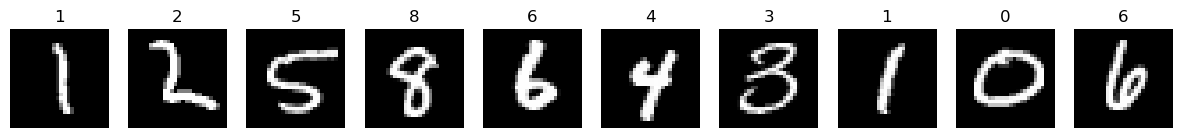

In [5]:
# Plot some sample images
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(y_train[i])
    ax.axis('off')
plt.show()

## Train a Simple Neural Network 

In [6]:
mlp_default = MLPClassifier(random_state=1, max_iter=20)
mlp_default.fit(X_train, y_train)

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=20, random_state=1)

In [8]:
y_pred_default = mlp_default.predict(X_test)

In [9]:
print("Accuracy (default):", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

Accuracy (default): 0.9740714285714286
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1354
           1       0.98      0.98      0.98      1625
           2       0.97      0.98      0.98      1377
           3       0.96      0.97      0.97      1422
           4       0.96      0.99      0.97      1391
           5       0.98      0.95      0.97      1285
           6       0.98      0.99      0.99      1324
           7       0.98      0.97      0.97      1409
           8       0.98      0.95      0.96      1436
           9       0.97      0.95      0.96      1377

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



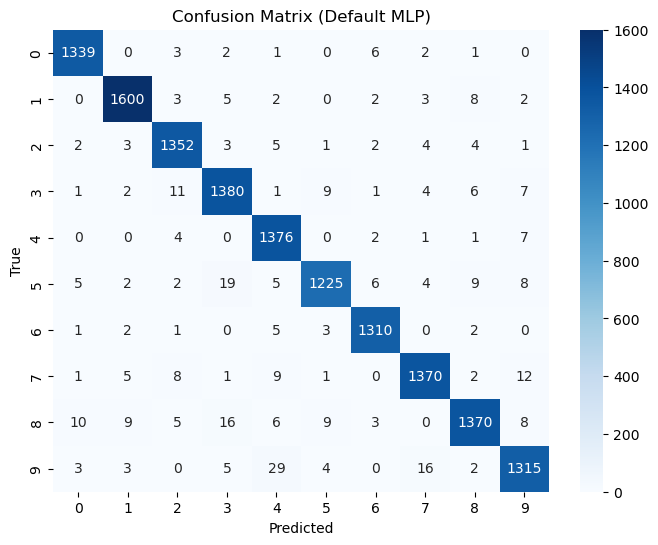

In [10]:
cm = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Default MLP)')
plt.show()

## Experiment with Different NN Hyperparameters

In [11]:
configs = [
    {'hidden_layer_sizes': (50,), 'activation': 'relu'},
    {'hidden_layer_sizes': (100,), 'activation': 'relu'},
    {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'},
    {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'},
]

In [12]:
results = []

for cfg in configs:
    print(f"Training: {cfg}")

    # Train NN
    clf = MLPClassifier(max_iter=20, random_state=1, **cfg)
    clf.fit(X_train, y_train)

    # Evaluate NN
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Configuration: {cfg}, Accuracy: {acc:.4f}")
    results.append({'config': cfg, 'accuracy': acc})
    print(f"Accuracy: {acc:.4f}")

Training: {'hidden_layer_sizes': (50,), 'activation': 'relu'}


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Configuration: {'hidden_layer_sizes': (50,), 'activation': 'relu'}, Accuracy: 0.9698
Accuracy: 0.9698
Training: {'hidden_layer_sizes': (100,), 'activation': 'relu'}


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Configuration: {'hidden_layer_sizes': (100,), 'activation': 'relu'}, Accuracy: 0.9741
Accuracy: 0.9741
Training: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Configuration: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}, Accuracy: 0.9771
Accuracy: 0.9771
Training: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}
Configuration: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}, Accuracy: 0.9681
Accuracy: 0.9681
Configuration: {'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}, Accuracy: 0.9681
Accuracy: 0.9681


/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


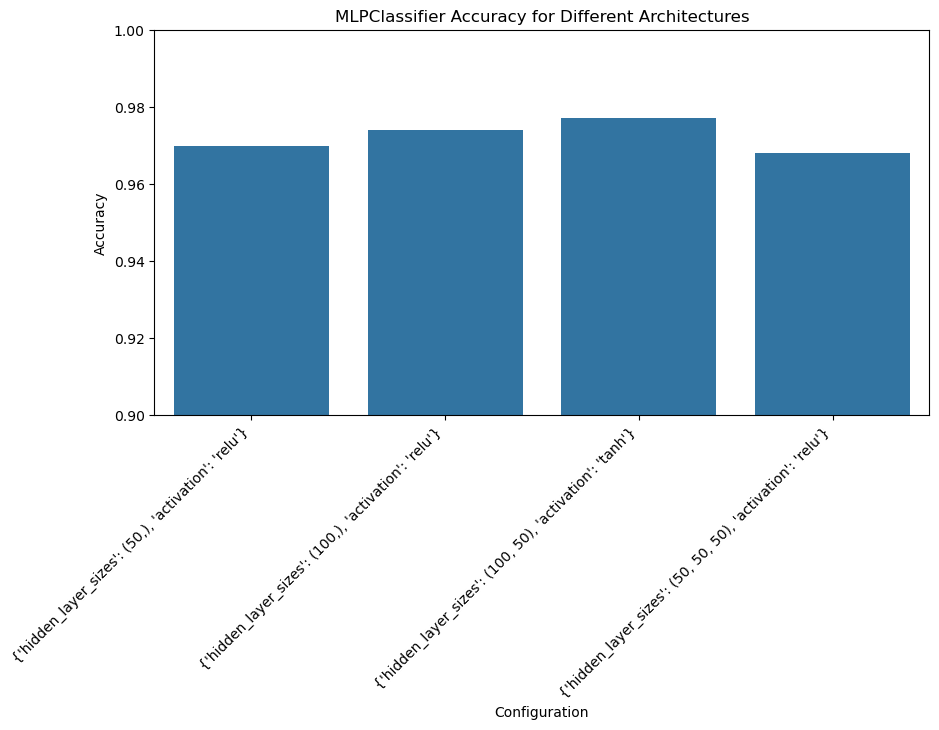

In [17]:
labels = [str(r['config']) for r in results]
accuracies = [r['accuracy'] for r in results]

plt.figure(figsize=(10,5))
sns.barplot(x=labels, y=accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Configuration')
plt.title('MLPClassifier Accuracy for Different Architectures')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.0)
plt.show()

In [ ]:
# 